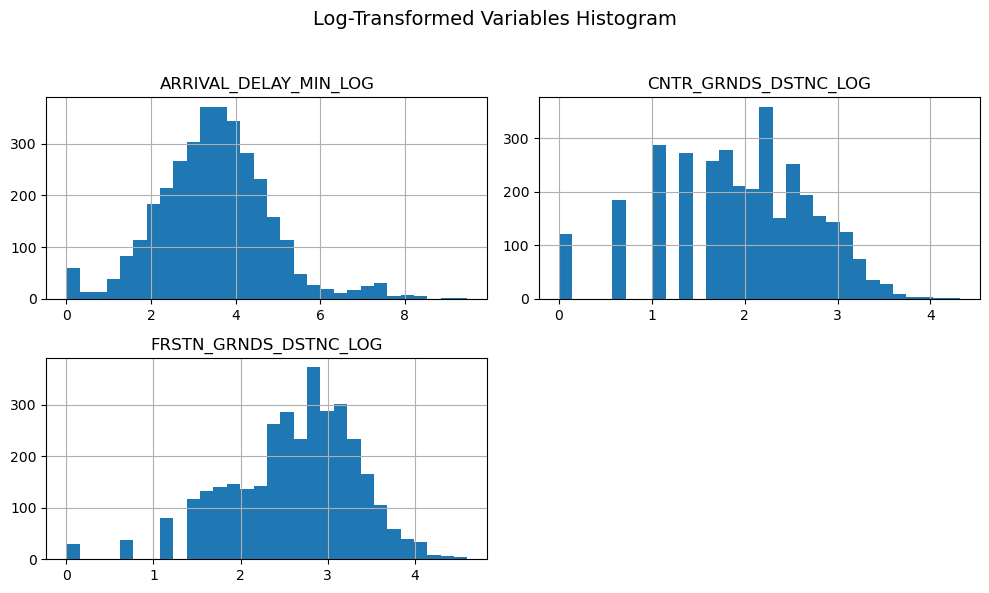

✅ 로그 변환(종속변수 제외) 및 원본 삭제 완료
- 입력:  /Users/igangsan/Desktop/ML/wildfire_preprocessed_2.csv
- 출력:  /Users/igangsan/Desktop/ML/wildfire_preprocessed_3_logs.csv
- 로그 컬럼: ['ARRIVAL_DELAY_MIN_LOG', 'CNTR_GRNDS_DSTNC_LOG', 'FRSTN_GRNDS_DSTNC_LOG']


In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 경로
INPUT_PREP = '/Users/igangsan/Desktop/ML/wildfire_preprocessed_2.csv'
OUTPUT_WITH_LOGS = os.path.join(os.path.dirname(INPUT_PREP), 'wildfire_preprocessed_3_logs.csv')

# 불러오기
df = pd.read_csv(INPUT_PREP)

# 로그 변환 대상 (종속변수 FIRE_SUPESN_HR는 제외)
log_targets = [
    'ARRIVAL_DELAY_MIN',   # 반드시 변환
    'CNTR_GRNDS_DSTNC',    # 변환 고려
    'FRSTN_GRNDS_DSTNC'    # 변환 고려
]

# 변환 + *_LOG 생성
created_logs = []
for col in log_targets:
    if col not in df.columns:
        print(f"[SKIP] '{col}' 컬럼 없음 (건너뜀)")
        continue

    # 숫자형 변환
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # 음수 방지(거리/시간 변수 특성상 음수 무의미) → 0으로 클리핑
    df[col] = df[col].clip(lower=0)

    # log1p 변환: 0도 안전
    log_col = f'{col}_LOG'
    df[log_col] = np.log1p(df[col])
    created_logs.append(log_col)

# 원본 컬럼 삭제
cols_to_drop = [c for c in log_targets if c in df.columns]
df.drop(columns=cols_to_drop, inplace=True)

# 저장
df.to_csv(OUTPUT_WITH_LOGS, index=False, encoding='utf-8-sig')

# 히스토그램: 로그 변환된 열만
if created_logs:
    df[created_logs].hist(bins=30, figsize=(10, 6))
    plt.suptitle("Log-Transformed Variables Histogram", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("로그 변환된 컬럼이 없습니다.")

print("✅ 로그 변환(종속변수 제외) 및 원본 삭제 완료")
print(f"- 입력:  {INPUT_PREP}")
print(f"- 출력:  {OUTPUT_WITH_LOGS}")
print("- 로그 컬럼:", created_logs)